## Install and import the required libraries

In [4]:
# install scikit-learn in the runtime environment
!pip install scikit-learn

In [2]:
# import the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
from google.colab import files

## Upload the data to Google Colab server for processing

In [5]:
# Allow the user to upload the file
uploaded = files.upload()

# Load the data
data = pd.read_csv(next(iter(uploaded.keys())))

Saving continuous_factory_process.csv to continuous_factory_process.csv


## Exploratory Data Analysis

In [6]:
# Explore the data
print(data.head())
print(data.describe())

            time_stamp  AmbientConditions.AmbientHumidity.U.Actual  \
0  2019-03-06 10:52:33                                       17.24   
1  2019-03-06 10:52:34                                       17.24   
2  2019-03-06 10:52:35                                       17.24   
3  2019-03-06 10:52:36                                       17.24   
4  2019-03-06 10:52:37                                       17.24   

   AmbientConditions.AmbientTemperature.U.Actual  \
0                                          23.53   
1                                          23.53   
2                                          23.53   
3                                          23.53   
4                                          23.53   

   Machine1.RawMaterial.Property1  Machine1.RawMaterial.Property2  \
0                           11.54                             200   
1                           11.54                             200   
2                           11.54                          

## Check for null values

In [7]:
data.isnull().sum()

time_stamp                                       0
AmbientConditions.AmbientHumidity.U.Actual       0
AmbientConditions.AmbientTemperature.U.Actual    0
Machine1.RawMaterial.Property1                   0
Machine1.RawMaterial.Property2                   0
                                                ..
Stage2.Output.Measurement12.U.Setpoint           0
Stage2.Output.Measurement13.U.Actual             0
Stage2.Output.Measurement13.U.Setpoint           0
Stage2.Output.Measurement14.U.Actual             0
Stage2.Output.Measurement14.U.Setpoint           0
Length: 116, dtype: int64

In [8]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
AmbientConditions.AmbientHumidity.U.Actual,1.000000,-0.197401,-0.634965,-0.530235,0.222924,-0.619726,0.083121,0.275358,0.021222,0.373958,...,-0.297675,NaN,-0.234360,NaN,-0.304985,NaN,-0.450853,NaN,-0.102675,NaN
AmbientConditions.AmbientTemperature.U.Actual,-0.197401,1.000000,0.260897,0.190859,-0.208466,0.322569,-0.098109,0.012758,-0.007012,0.002999,...,0.110698,NaN,0.124021,NaN,0.107805,NaN,0.256470,NaN,0.069680,NaN
Machine1.RawMaterial.Property1,-0.634965,0.260897,1.000000,0.791494,-0.488552,0.830277,-0.062169,-0.230600,-0.026998,-0.596093,...,0.103597,NaN,0.068386,NaN,0.128299,NaN,0.286275,NaN,-0.055226,NaN
Machine1.RawMaterial.Property2,-0.530235,0.190859,0.791494,1.000000,-0.901975,0.935116,0.014332,-0.164382,-0.004444,-0.581848,...,0.087565,NaN,0.059688,NaN,0.113846,NaN,0.276743,NaN,-0.085914,NaN
Machine1.RawMaterial.Property3,0.222924,-0.208466,-0.488552,-0.901975,1.000000,-0.811362,-0.049818,0.053632,-0.012972,0.417044,...,-0.014162,NaN,-0.007635,NaN,-0.033838,NaN,-0.174362,NaN,0.108902,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stage2.Output.Measurement12.U.Setpoint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage2.Output.Measurement13.U.Actual,-0.450853,0.256470,0.286275,0.276743,-0.174362,0.321146,-0.050199,-0.378013,-0.054471,0.237867,...,0.487249,NaN,0.470365,NaN,0.510452,NaN,1.000000,NaN,0.382450,NaN
Stage2.Output.Measurement13.U.Setpoint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage2.Output.Measurement14.U.Actual,-0.102675,0.069680,-0.055226,-0.085914,0.108902,-0.072595,0.024448,-0.475261,-0.047625,0.315330,...,0.679508,NaN,0.690133,NaN,0.677667,NaN,0.382450,NaN,1.000000,NaN


#### In the above section, we can observe the correlation between parameters. For that we exported the correlation matrix to excel and highlighted cells with greater that 0.7 correlation (both +ve and -ve).
### Also we need to predict the output for Stage 2 as well.

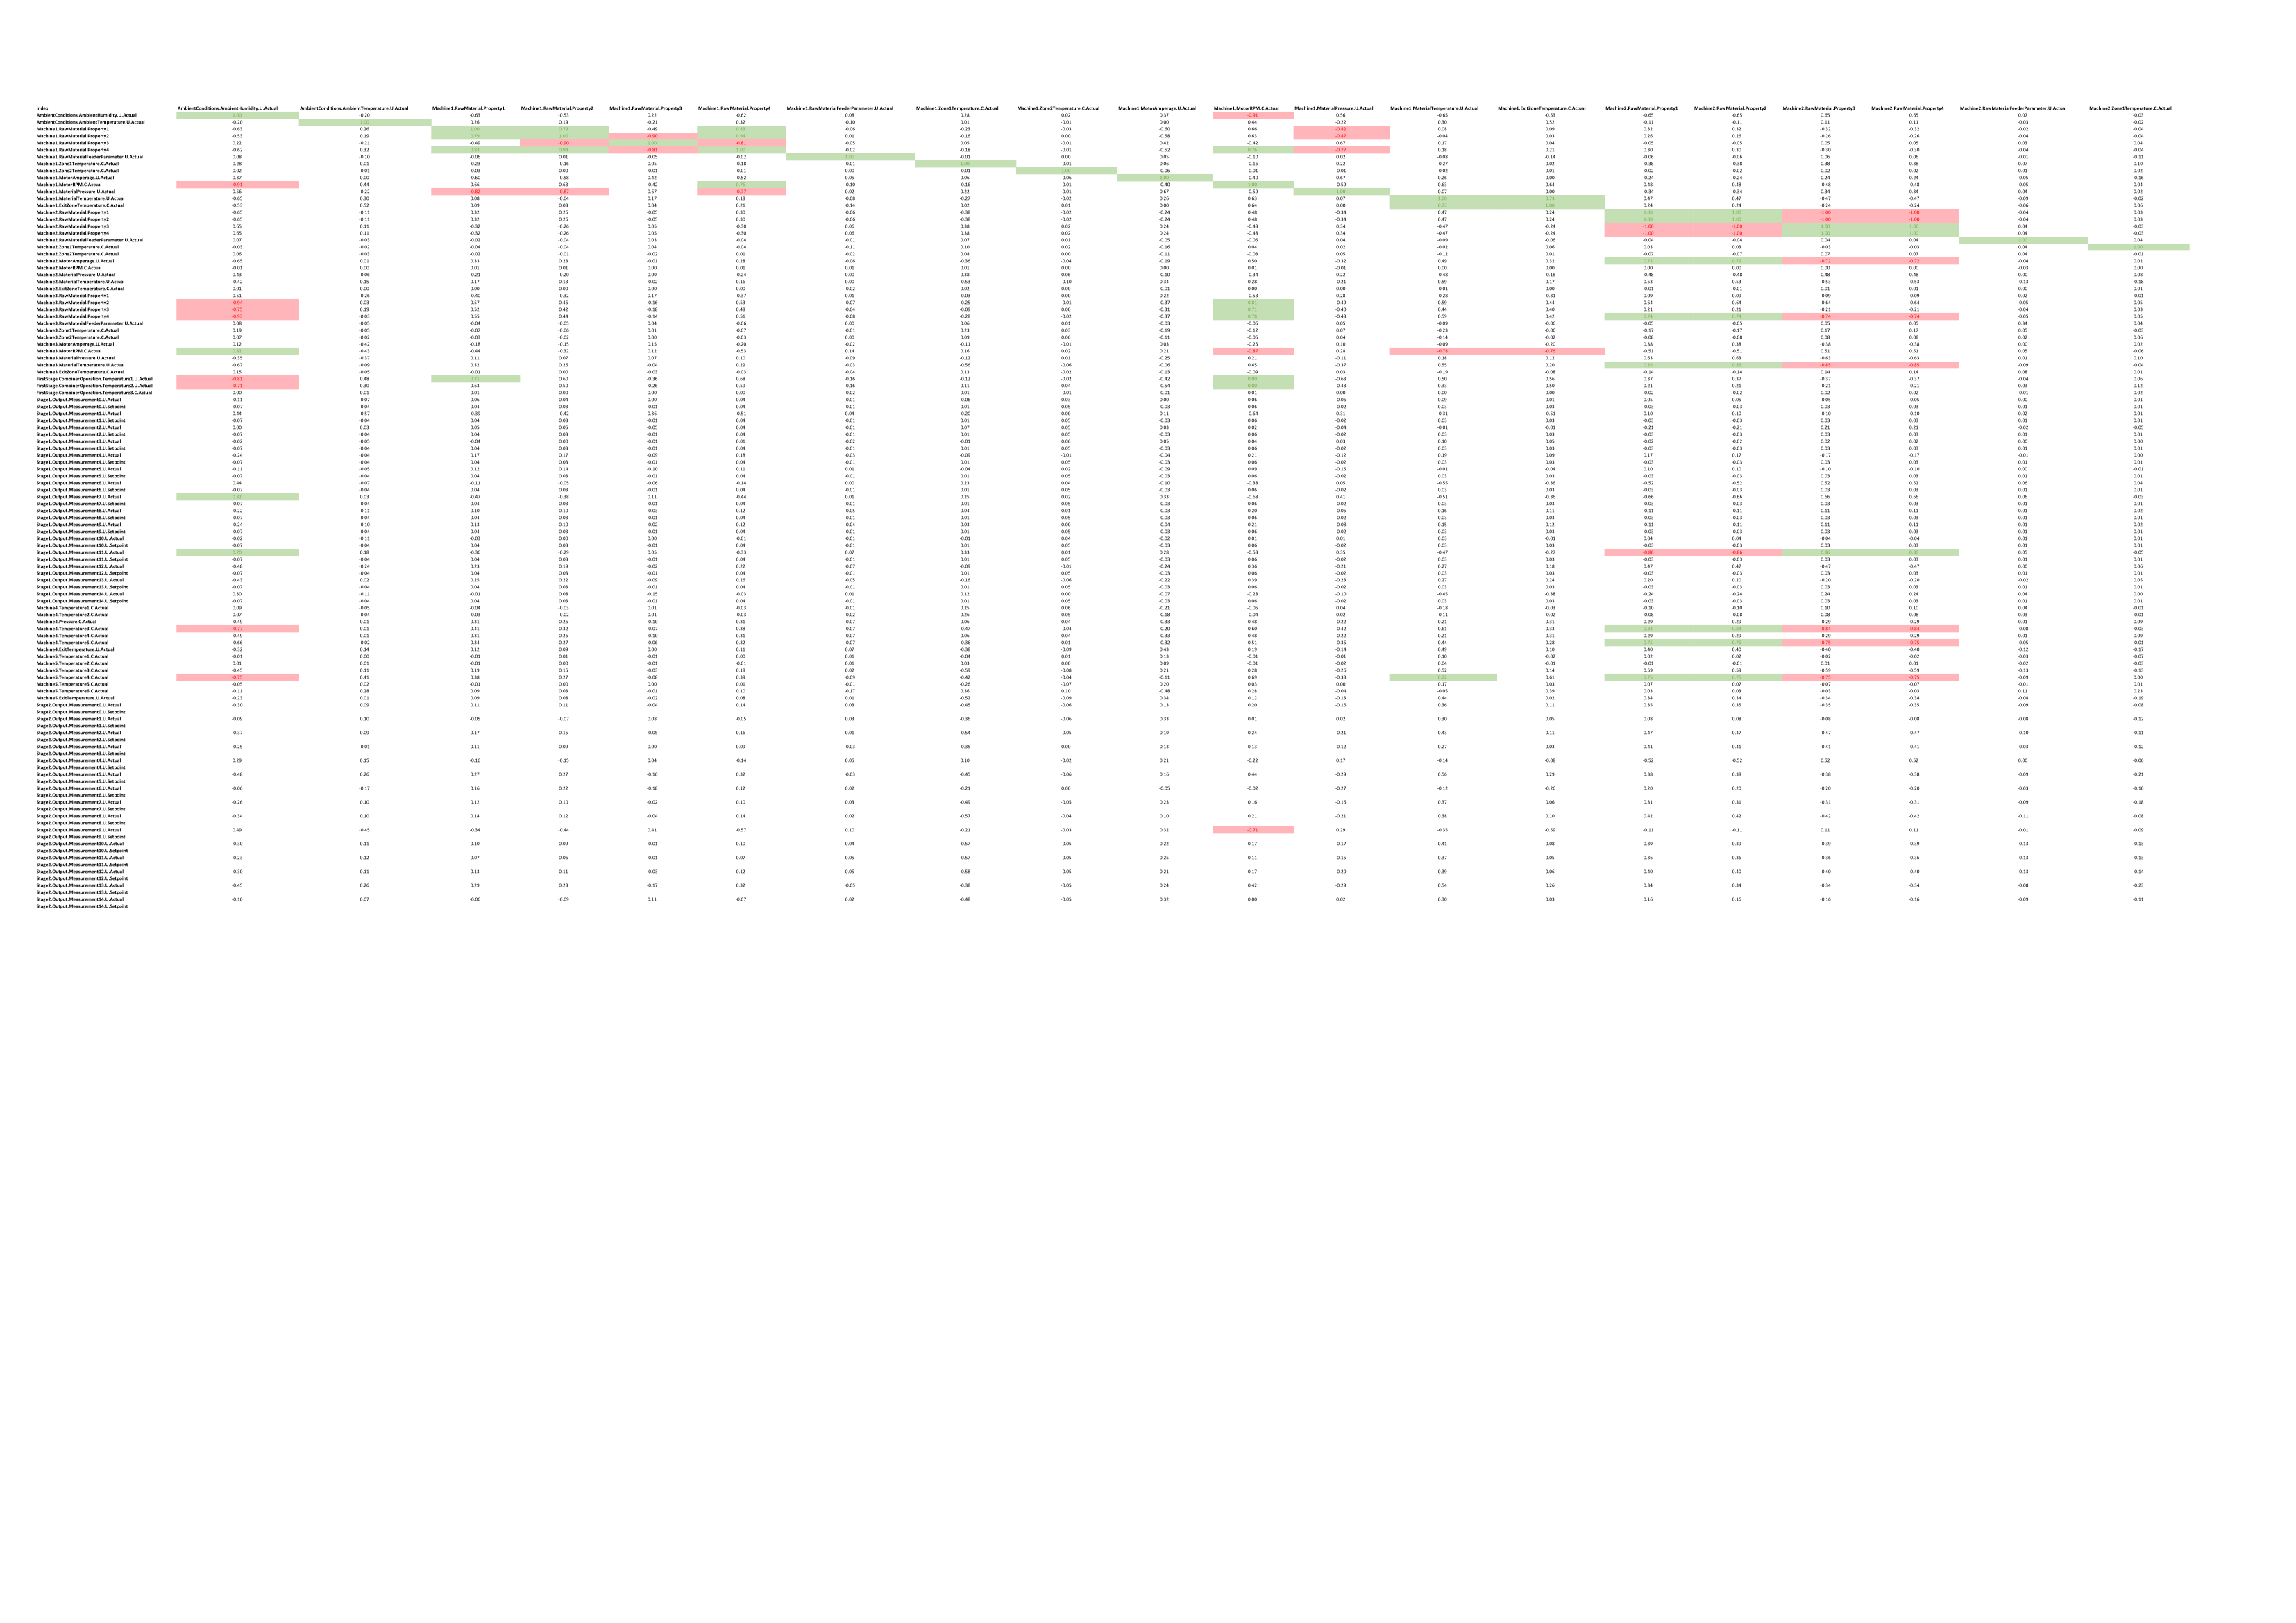

#### Here we observe following correlations { [-1,-0.7] , [0.7,1] } :

1.  Positive correlations between:
    *   Ambient Humidity & Machine3 MotorRPM
    *   Machine 1 Raw Material Properties 1,2,4 & First Stage Combiner Operation Temperature 1
    *  Machine1 Raw Material Property 2, 3, 4 & Machine 1 Motor RPM
    *  First Stage Combiner Operation Temperature 2 & Machine 1 Motor RPM
    *  Machine 1 Material Temperature & Machine 1 Material Temperature, Machine 1 Exit Zone Temperature, Machine 5 Temperature 4
    *  Machine 2 Raw Material Property 1, 2 & Machine 2 Motor Amperage, Machine 3 Material Temperature, Machine 4 Temperature 3, Machine 4 Temperature 5
    *  Machine 1 Material Temperature & Machine 1 Exit Zone Temperature, Machine 5 Temperature 4

2.  Negetive correlations between:
    *   Machine 1 Motor RPM & Stage2 Output Measurement 9
    *   Machine 2 Raw Material Property 1 & Machine 2 Raw Material Property 3, Machine 2 Raw Material Property 4
    *   Machine 1 Motor RPM & Stage2 Output Measurement 9
    *   Ambient Humidity & Machine1 MotorRPM, Machine 3 Raw Material Property2-4, FirstStage Combiner Operation Temperature 1-2, Machine 5 Temperature 4
    *   Machine 1 Material Pressure & Machine 1 Raw Material Property 1-2
    *   Machine 1 Raw Material Property 2 & Machine 1 Raw Material Property 3

These are the major observations.


#### We understand that the dataset represents a 2 stage process:


##### 1.   Stage 1: Machine 1, 2 and 3 running in parallel, cumulating into output 01
##### 2.   Stage 2: Machine 4 and 5 running in series, cumulating into output 02



## Spliting data stepwise

In [9]:
ambient_conditions = data[['AmbientConditions.AmbientHumidity.U.Actual', 'AmbientConditions.AmbientTemperature.U.Actual']]

In [10]:
machine01 = data[['Machine1.RawMaterial.Property1', 'Machine1.RawMaterial.Property2','Machine1.RawMaterial.Property3', 'Machine1.RawMaterial.Property4','Machine1.RawMaterialFeederParameter.U.Actual', 'Machine1.Zone1Temperature.C.Actual', 'Machine1.Zone2Temperature.C.Actual', 'Machine1.MotorAmperage.U.Actual', 'Machine1.MotorRPM.C.Actual', 'Machine1.MaterialPressure.U.Actual', 'Machine1.MaterialTemperature.U.Actual', 'Machine1.ExitZoneTemperature.C.Actual']]

machine02 = data[['Machine2.RawMaterial.Property1', 'Machine2.RawMaterial.Property2', 'Machine2.RawMaterial.Property3', 'Machine2.RawMaterial.Property4', 'Machine2.RawMaterialFeederParameter.U.Actual', 'Machine2.Zone1Temperature.C.Actual', 'Machine2.Zone2Temperature.C.Actual', 'Machine2.MotorAmperage.U.Actual', 'Machine2.MotorRPM.C.Actual', 'Machine2.MaterialPressure.U.Actual', 'Machine2.MaterialTemperature.U.Actual', 'Machine2.ExitZoneTemperature.C.Actual']]

machine03 = data[['Machine3.RawMaterial.Property1', 'Machine3.RawMaterial.Property2', 'Machine3.RawMaterial.Property3', 'Machine3.RawMaterial.Property4', 'Machine3.RawMaterialFeederParameter.U.Actual', 'Machine3.Zone1Temperature.C.Actual', 'Machine3.Zone2Temperature.C.Actual', 'Machine3.MotorAmperage.U.Actual', 'Machine3.MotorRPM.C.Actual', 'Machine3.MaterialPressure.U.Actual', 'Machine3.MaterialTemperature.U.Actual', 'Machine3.ExitZoneTemperature.C.Actual']]

first_stage = data[['FirstStage.CombinerOperation.Temperature1.U.Actual', 'FirstStage.CombinerOperation.Temperature2.U.Actual', 'FirstStage.CombinerOperation.Temperature3.C.Actual']]

stage1_output = data[['Stage1.Output.Measurement0.U.Actual', 'Stage1.Output.Measurement0.U.Setpoint', 'Stage1.Output.Measurement1.U.Actual', 'Stage1.Output.Measurement1.U.Setpoint', 'Stage1.Output.Measurement2.U.Actual', 'Stage1.Output.Measurement2.U.Setpoint', 'Stage1.Output.Measurement3.U.Actual', 'Stage1.Output.Measurement3.U.Setpoint', 'Stage1.Output.Measurement4.U.Actual', 'Stage1.Output.Measurement4.U.Setpoint', 'Stage1.Output.Measurement5.U.Actual', 'Stage1.Output.Measurement5.U.Setpoint', 'Stage1.Output.Measurement6.U.Actual', 'Stage1.Output.Measurement6.U.Setpoint', 'Stage1.Output.Measurement7.U.Actual', 'Stage1.Output.Measurement7.U.Setpoint', 'Stage1.Output.Measurement8.U.Actual', 'Stage1.Output.Measurement8.U.Setpoint', 'Stage1.Output.Measurement9.U.Actual', 'Stage1.Output.Measurement9.U.Setpoint', 'Stage1.Output.Measurement10.U.Actual', 'Stage1.Output.Measurement10.U.Setpoint', 'Stage1.Output.Measurement11.U.Actual', 'Stage1.Output.Measurement11.U.Setpoint', 'Stage1.Output.Measurement12.U.Actual', 'Stage1.Output.Measurement12.U.Setpoint', 'Stage1.Output.Measurement13.U.Actual', 'Stage1.Output.Measurement13.U.Setpoint', 'Stage1.Output.Measurement14.U.Actual', 'Stage1.Output.Measurement14.U.Setpoint']]

machine04 = data[['Machine4.Temperature1.C.Actual', 'Machine4.Temperature2.C.Actual', 'Machine4.Pressure.C.Actual', 'Machine4.Temperature3.C.Actual', 'Machine4.Temperature4.C.Actual', 'Machine4.Temperature5.C.Actual', 'Machine4.ExitTemperature.U.Actual']]

machine05 = data[['Machine5.Temperature1.C.Actual', 'Machine5.Temperature2.C.Actual', 'Machine5.Temperature3.C.Actual', 'Machine5.Temperature4.C.Actual', 'Machine5.Temperature5.C.Actual', 'Machine5.Temperature6.C.Actual', 'Machine5.ExitTemperature.U.Actual']]

stage2_output = data[['Stage2.Output.Measurement0.U.Actual', 'Stage2.Output.Measurement0.U.Setpoint', 'Stage2.Output.Measurement1.U.Actual', 'Stage2.Output.Measurement1.U.Setpoint', 'Stage2.Output.Measurement2.U.Actual', 'Stage2.Output.Measurement2.U.Setpoint', 'Stage2.Output.Measurement3.U.Actual', 'Stage2.Output.Measurement3.U.Setpoint', 'Stage2.Output.Measurement4.U.Actual', 'Stage2.Output.Measurement4.U.Setpoint', 'Stage2.Output.Measurement5.U.Actual', 'Stage2.Output.Measurement5.U.Setpoint', 'Stage2.Output.Measurement6.U.Actual', 'Stage2.Output.Measurement6.U.Setpoint', 'Stage2.Output.Measurement7.U.Actual', 'Stage2.Output.Measurement7.U.Setpoint', 'Stage2.Output.Measurement8.U.Actual', 'Stage2.Output.Measurement8.U.Setpoint', 'Stage2.Output.Measurement9.U.Actual', 'Stage2.Output.Measurement9.U.Setpoint', 'Stage2.Output.Measurement10.U.Actual', 'Stage2.Output.Measurement10.U.Setpoint', 'Stage2.Output.Measurement11.U.Actual', 'Stage2.Output.Measurement11.U.Setpoint', 'Stage2.Output.Measurement12.U.Actual', 'Stage2.Output.Measurement12.U.Setpoint', 'Stage2.Output.Measurement13.U.Actual', 'Stage2.Output.Measurement13.U.Setpoint', 'Stage2.Output.Measurement14.U.Actual', 'Stage2.Output.Measurement14.U.Setpoint']]

## Anaylse each sub dataset

#### Check for Null values

In [11]:
machine01.isnull().sum()

Machine1.RawMaterial.Property1                  0
Machine1.RawMaterial.Property2                  0
Machine1.RawMaterial.Property3                  0
Machine1.RawMaterial.Property4                  0
Machine1.RawMaterialFeederParameter.U.Actual    0
Machine1.Zone1Temperature.C.Actual              0
Machine1.Zone2Temperature.C.Actual              0
Machine1.MotorAmperage.U.Actual                 0
Machine1.MotorRPM.C.Actual                      0
Machine1.MaterialPressure.U.Actual              0
Machine1.MaterialTemperature.U.Actual           0
Machine1.ExitZoneTemperature.C.Actual           0
dtype: int64

In [12]:
machine02.isnull().sum()

Machine2.RawMaterial.Property1                  0
Machine2.RawMaterial.Property2                  0
Machine2.RawMaterial.Property3                  0
Machine2.RawMaterial.Property4                  0
Machine2.RawMaterialFeederParameter.U.Actual    0
Machine2.Zone1Temperature.C.Actual              0
Machine2.Zone2Temperature.C.Actual              0
Machine2.MotorAmperage.U.Actual                 0
Machine2.MotorRPM.C.Actual                      0
Machine2.MaterialPressure.U.Actual              0
Machine2.MaterialTemperature.U.Actual           0
Machine2.ExitZoneTemperature.C.Actual           0
dtype: int64

In [13]:
machine03.isnull().sum()

Machine3.RawMaterial.Property1                  0
Machine3.RawMaterial.Property2                  0
Machine3.RawMaterial.Property3                  0
Machine3.RawMaterial.Property4                  0
Machine3.RawMaterialFeederParameter.U.Actual    0
Machine3.Zone1Temperature.C.Actual              0
Machine3.Zone2Temperature.C.Actual              0
Machine3.MotorAmperage.U.Actual                 0
Machine3.MotorRPM.C.Actual                      0
Machine3.MaterialPressure.U.Actual              0
Machine3.MaterialTemperature.U.Actual           0
Machine3.ExitZoneTemperature.C.Actual           0
dtype: int64

In [14]:
first_stage.isnull().sum()

FirstStage.CombinerOperation.Temperature1.U.Actual    0
FirstStage.CombinerOperation.Temperature2.U.Actual    0
FirstStage.CombinerOperation.Temperature3.C.Actual    0
dtype: int64

In [15]:
stage1_output.isnull().sum()

Stage1.Output.Measurement0.U.Actual       0
Stage1.Output.Measurement0.U.Setpoint     0
Stage1.Output.Measurement1.U.Actual       0
Stage1.Output.Measurement1.U.Setpoint     0
Stage1.Output.Measurement2.U.Actual       0
Stage1.Output.Measurement2.U.Setpoint     0
Stage1.Output.Measurement3.U.Actual       0
Stage1.Output.Measurement3.U.Setpoint     0
Stage1.Output.Measurement4.U.Actual       0
Stage1.Output.Measurement4.U.Setpoint     0
Stage1.Output.Measurement5.U.Actual       0
Stage1.Output.Measurement5.U.Setpoint     0
Stage1.Output.Measurement6.U.Actual       0
Stage1.Output.Measurement6.U.Setpoint     0
Stage1.Output.Measurement7.U.Actual       0
Stage1.Output.Measurement7.U.Setpoint     0
Stage1.Output.Measurement8.U.Actual       0
Stage1.Output.Measurement8.U.Setpoint     0
Stage1.Output.Measurement9.U.Actual       0
Stage1.Output.Measurement9.U.Setpoint     0
Stage1.Output.Measurement10.U.Actual      0
Stage1.Output.Measurement10.U.Setpoint    0
Stage1.Output.Measurement11.U.Ac

In [16]:
machine04.isnull().sum()

Machine4.Temperature1.C.Actual       0
Machine4.Temperature2.C.Actual       0
Machine4.Pressure.C.Actual           0
Machine4.Temperature3.C.Actual       0
Machine4.Temperature4.C.Actual       0
Machine4.Temperature5.C.Actual       0
Machine4.ExitTemperature.U.Actual    0
dtype: int64

In [17]:
machine05.isnull().sum()

Machine5.Temperature1.C.Actual       0
Machine5.Temperature2.C.Actual       0
Machine5.Temperature3.C.Actual       0
Machine5.Temperature4.C.Actual       0
Machine5.Temperature5.C.Actual       0
Machine5.Temperature6.C.Actual       0
Machine5.ExitTemperature.U.Actual    0
dtype: int64

In [18]:
stage2_output.isnull().sum()

Stage2.Output.Measurement0.U.Actual       0
Stage2.Output.Measurement0.U.Setpoint     0
Stage2.Output.Measurement1.U.Actual       0
Stage2.Output.Measurement1.U.Setpoint     0
Stage2.Output.Measurement2.U.Actual       0
Stage2.Output.Measurement2.U.Setpoint     0
Stage2.Output.Measurement3.U.Actual       0
Stage2.Output.Measurement3.U.Setpoint     0
Stage2.Output.Measurement4.U.Actual       0
Stage2.Output.Measurement4.U.Setpoint     0
Stage2.Output.Measurement5.U.Actual       0
Stage2.Output.Measurement5.U.Setpoint     0
Stage2.Output.Measurement6.U.Actual       0
Stage2.Output.Measurement6.U.Setpoint     0
Stage2.Output.Measurement7.U.Actual       0
Stage2.Output.Measurement7.U.Setpoint     0
Stage2.Output.Measurement8.U.Actual       0
Stage2.Output.Measurement8.U.Setpoint     0
Stage2.Output.Measurement9.U.Actual       0
Stage2.Output.Measurement9.U.Setpoint     0
Stage2.Output.Measurement10.U.Actual      0
Stage2.Output.Measurement10.U.Setpoint    0
Stage2.Output.Measurement11.U.Ac

##### We can observe that none of the dataset has a missing value.

#### Check for correalation matrix within each data set

In [19]:
machine01.corr()

,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual
Machine1.RawMaterial.Property1,1.000000,0.791494,-0.488552,0.830277,-0.062169,-0.230600,-0.026998,-0.596093,0.657032,-0.822298,0.084999,0.086599
Machine1.RawMaterial.Property2,0.791494,1.000000,-0.901975,0.935116,0.014332,-0.164382,-0.004444,-0.581848,0.632927,-0.867079,-0.036090,0.025919
Machine1.RawMaterial.Property3,-0.488552,-0.901975,1.000000,-0.811362,-0.049818,0.053632,-0.012972,0.417044,-0.417355,0.673046,0.172377,0.043204
Machine1.RawMaterial.Property4,0.830277,0.935116,-0.811362,1.000000,-0.016489,-0.177184,-0.008792,-0.522473,0.755781,-0.769351,0.176758,0.212597
Machine1.RawMaterialFeederParameter.U.Actual,-0.062169,0.014332,-0.049818,-0.016489,1.000000,-0.006745,-0.004268,0.052260,-0.102319,0.023835,-0.082460,-0.141282
Machine1.Zone1Temperature.C.Actual,-0.230600,-0.164382,0.053632,-0.177184,-0.006745,1.000000,-0.008721,0.058101,-0.156828,0.224031,-0.271588,0.016389
Machine1.Zone2Temperature.C.Actual,-0.026998,-0.004444,-0.012972,-0.008792,-0.004268,-0.008721,1.000000,-0.055752,-0.011199,-0.011392,-0.015028,0.009942
Machine1.MotorAmperage.U.Actual,-0.596093,-0.581848,0.417044,-0.522473,0.052260,0.058101,-0.055752,1.000000,-0.403894,0.672187,0.259590,-0.002584
Machine1.MotorRPM.C.Actual,0.657032,0.632927,-0.417355,0.755781,-0.102319,-0.156828,-0.011199,-0.403894,1.000000,-0.585787,0.628453,0.636046
Machine1.MaterialPressure.U.Actual,-0.822298,-0.867079,0.673046,-0.769351,0.023835,0.224031,-0.011392,0.672187,-0.585787,1.000000,0.074421,-0.004812


In [20]:
machine02.corr()

,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,Machine2.Zone1Temperature.C.Actual,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,Machine2.MotorRPM.C.Actual,Machine2.MaterialPressure.U.Actual,Machine2.MaterialTemperature.U.Actual,Machine2.ExitZoneTemperature.C.Actual
Machine2.RawMaterial.Property1,1.000000,1.000000,-1.000000,-1.000000,-0.044282,0.032089,-0.068775,0.720639,-0.001414,-0.480183,0.527967,-0.006936
Machine2.RawMaterial.Property2,1.000000,1.000000,-1.000000,-1.000000,-0.044282,0.032089,-0.068775,0.720639,-0.001414,-0.480183,0.527967,-0.006936
Machine2.RawMaterial.Property3,-1.000000,-1.000000,1.000000,1.000000,0.044282,-0.032089,0.068775,-0.720639,0.001414,0.480183,-0.527967,0.006936
Machine2.RawMaterial.Property4,-1.000000,-1.000000,1.000000,1.000000,0.044282,-0.032089,0.068775,-0.720639,0.001414,0.480183,-0.527967,0.006936
Machine2.RawMaterialFeederParameter.U.Actual,-0.044282,-0.044282,0.044282,0.044282,1.000000,0.038783,0.044969,-0.044726,-0.031662,0.001923,-0.127507,-0.004942
Machine2.Zone1Temperature.C.Actual,0.032089,0.032089,-0.032089,-0.032089,0.038783,1.000000,-0.008108,0.024389,0.000349,0.082021,-0.175444,0.012160
Machine2.Zone2Temperature.C.Actual,-0.068775,-0.068775,0.068775,0.068775,0.044969,-0.008108,1.000000,-0.072519,0.012788,0.149148,-0.237089,0.010253
Machine2.MotorAmperage.U.Actual,0.720639,0.720639,-0.720639,-0.720639,-0.044726,0.024389,-0.072519,1.000000,-0.003376,-0.430990,0.503224,-0.000426
Machine2.MotorRPM.C.Actual,-0.001414,-0.001414,0.001414,0.001414,-0.031662,0.000349,0.012788,-0.003376,1.000000,0.132604,-0.004583,0.011658
Machine2.MaterialPressure.U.Actual,-0.480183,-0.480183,0.480183,0.480183,0.001923,0.082021,0.149148,-0.430990,0.132604,1.000000,-0.643747,0.016919


In [21]:
machine03.corr()

,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual
Machine3.RawMaterial.Property1,1.000000,-0.596905,-0.937145,-0.432320,0.018830,-0.003568,0.003443,0.782278,0.336556,0.477337,0.066659,0.052298
Machine3.RawMaterial.Property2,-0.596905,1.000000,0.839346,0.981515,-0.052475,-0.136909,-0.059481,-0.148395,-0.703566,0.311683,0.621397,-0.141203
Machine3.RawMaterial.Property3,-0.937145,0.839346,1.000000,0.719794,-0.035580,-0.057127,-0.028202,-0.594563,-0.534024,-0.187857,0.225094,-0.096846
Machine3.RawMaterial.Property4,-0.432320,0.981515,0.719794,1.000000,-0.054486,-0.154724,-0.066029,0.019826,-0.710457,0.464167,0.714291,-0.146223
Machine3.RawMaterialFeederParameter.U.Actual,0.018830,-0.052475,-0.035580,-0.054486,1.000000,0.045688,0.009972,0.011455,0.058628,0.005213,-0.091787,0.061622
Machine3.Zone1Temperature.C.Actual,-0.003568,-0.136909,-0.057127,-0.154724,0.045688,1.000000,0.062892,-0.026621,0.131834,-0.053055,-0.356823,0.229295
Machine3.Zone2Temperature.C.Actual,0.003443,-0.059481,-0.028202,-0.066029,0.009972,0.062892,1.000000,-0.014684,0.049700,0.004604,-0.143004,0.040610
Machine3.MotorAmperage.U.Actual,0.782278,-0.148395,-0.594563,0.019826,0.011455,-0.026621,-0.014684,1.000000,0.095149,0.749250,0.331500,0.011778
Machine3.MotorRPM.C.Actual,0.336556,-0.703566,-0.534024,-0.710457,0.058628,0.131834,0.049700,0.095149,1.000000,-0.354561,-0.475694,0.112301
Machine3.MaterialPressure.U.Actual,0.477337,0.311683,-0.187857,0.464167,0.005213,-0.053055,0.004604,0.749250,-0.354561,1.000000,0.514630,-0.001189


In [22]:
first_stage.corr()

,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual,FirstStage.CombinerOperation.Temperature3.C.Actual
FirstStage.CombinerOperation.Temperature1.U.Actual,1.000000,0.823371,0.003878
FirstStage.CombinerOperation.Temperature2.U.Actual,0.823371,1.000000,0.016599
FirstStage.CombinerOperation.Temperature3.C.Actual,0.003878,0.016599,1.000000


In [23]:
stage1_output.corr()

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement4.U.Setpoint,...,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint
Stage1.Output.Measurement0.U.Actual,1.000000,0.872133,0.138416,0.872133,0.648980,0.872133,0.690621,0.872133,0.591623,0.872133,...,0.423417,0.872133,-0.009368,0.872133,0.147277,0.872133,0.222688,0.872133,0.108960,0.872133
Stage1.Output.Measurement0.U.Setpoint,0.872133,1.000000,0.073663,1.000000,0.681517,1.000000,0.638383,1.000000,0.536711,1.000000,...,0.447085,1.000000,0.037088,1.000000,0.114502,1.000000,0.193427,1.000000,0.084675,1.000000
Stage1.Output.Measurement1.U.Actual,0.138416,0.073663,1.000000,0.073663,-0.023623,0.073663,0.104108,0.073663,-0.067299,0.073663,...,0.138809,0.073663,-0.007110,0.073663,-0.156962,0.073663,-0.245085,0.073663,0.119674,0.073663
Stage1.Output.Measurement1.U.Setpoint,0.872133,1.000000,0.073663,1.000000,0.681517,1.000000,0.638383,1.000000,0.536711,1.000000,...,0.447085,1.000000,0.037088,1.000000,0.114502,1.000000,0.193427,1.000000,0.084675,1.000000
Stage1.Output.Measurement2.U.Actual,0.648980,0.681517,-0.023623,0.681517,1.000000,0.681517,0.560314,0.681517,0.356377,0.681517,...,0.320511,0.681517,0.139770,0.681517,-0.030878,0.681517,0.001712,0.681517,0.035510,0.681517
Stage1.Output.Measurement2.U.Setpoint,0.872133,1.000000,0.073663,1.000000,0.681517,1.000000,0.638383,1.000000,0.536711,1.000000,...,0.447085,1.000000,0.037088,1.000000,0.114502,1.000000,0.193427,1.000000,0.084675,1.000000
Stage1.Output.Measurement3.U.Actual,0.690621,0.638383,0.104108,0.638383,0.560314,0.638383,1.000000,0.638383,0.466694,0.638383,...,0.364614,0.638383,0.038259,0.638383,0.058104,0.638383,0.134533,0.638383,0.066597,0.638383
Stage1.Output.Measurement3.U.Setpoint,0.872133,1.000000,0.073663,1.000000,0.681517,1.000000,0.638383,1.000000,0.536711,1.000000,...,0.447085,1.000000,0.037088,1.000000,0.114502,1.000000,0.193427,1.000000,0.084675,1.000000
Stage1.Output.Measurement4.U.Actual,0.591623,0.536711,-0.067299,0.536711,0.356377,0.536711,0.466694,0.536711,1.000000,0.536711,...,0.320951,0.536711,-0.136713,0.536711,0.273120,0.536711,0.326728,0.536711,0.084881,0.536711
Stage1.Output.Measurement4.U.Setpoint,0.872133,1.000000,0.073663,1.000000,0.681517,1.000000,0.638383,1.000000,0.536711,1.000000,...,0.447085,1.000000,0.037088,1.000000,0.114502,1.000000,0.193427,1.000000,0.084675,1.000000


In [24]:
machine04.corr()

,Machine4.Temperature1.C.Actual,Machine4.Temperature2.C.Actual,Machine4.Pressure.C.Actual,Machine4.Temperature3.C.Actual,Machine4.Temperature4.C.Actual,Machine4.Temperature5.C.Actual,Machine4.ExitTemperature.U.Actual
Machine4.Temperature1.C.Actual,1.000000,0.819141,-0.010127,0.083841,-0.010127,0.343152,-0.303232
Machine4.Temperature2.C.Actual,0.819141,1.000000,-0.124993,0.103225,-0.124993,0.340730,-0.237116
Machine4.Pressure.C.Actual,-0.010127,-0.124993,1.000000,0.224375,1.000000,0.255353,-0.132143
Machine4.Temperature3.C.Actual,0.083841,0.103225,0.224375,1.000000,0.224375,0.883200,0.547965
Machine4.Temperature4.C.Actual,-0.010127,-0.124993,1.000000,0.224375,1.000000,0.255353,-0.132143
Machine4.Temperature5.C.Actual,0.343152,0.340730,0.255353,0.883200,0.255353,1.000000,0.348922
Machine4.ExitTemperature.U.Actual,-0.303232,-0.237116,-0.132143,0.547965,-0.132143,0.348922,1.000000


In [25]:
machine05.corr()

,Machine5.Temperature1.C.Actual,Machine5.Temperature2.C.Actual,Machine5.Temperature3.C.Actual,Machine5.Temperature4.C.Actual,Machine5.Temperature5.C.Actual,Machine5.Temperature6.C.Actual,Machine5.ExitTemperature.U.Actual
Machine5.Temperature1.C.Actual,1.000000,0.058399,0.118166,0.022976,0.124215,-0.174276,0.274446
Machine5.Temperature2.C.Actual,0.058399,1.000000,0.087124,0.009114,-0.025489,-0.142295,0.090477
Machine5.Temperature3.C.Actual,0.118166,0.087124,1.000000,0.731960,0.208221,-0.597213,0.661931
Machine5.Temperature4.C.Actual,0.022976,0.009114,0.731960,1.000000,0.103726,0.055851,0.377982
Machine5.Temperature5.C.Actual,0.124215,-0.025489,0.208221,0.103726,1.000000,-0.219709,0.414482
Machine5.Temperature6.C.Actual,-0.174276,-0.142295,-0.597213,0.055851,-0.219709,1.000000,-0.568041
Machine5.ExitTemperature.U.Actual,0.274446,0.090477,0.661931,0.377982,0.414482,-0.568041,1.000000


In [26]:
stage2_output.corr()

,Stage2.Output.Measurement0.U.Actual,Stage2.Output.Measurement0.U.Setpoint,Stage2.Output.Measurement1.U.Actual,Stage2.Output.Measurement1.U.Setpoint,Stage2.Output.Measurement2.U.Actual,Stage2.Output.Measurement2.U.Setpoint,Stage2.Output.Measurement3.U.Actual,Stage2.Output.Measurement3.U.Setpoint,Stage2.Output.Measurement4.U.Actual,Stage2.Output.Measurement4.U.Setpoint,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
Stage2.Output.Measurement0.U.Actual,1.000000,NaN,0.432311,NaN,0.592423,NaN,0.278284,NaN,-0.066283,NaN,...,0.685093,NaN,0.677807,NaN,0.678814,NaN,0.367467,NaN,0.523270,NaN
Stage2.Output.Measurement0.U.Setpoint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage2.Output.Measurement1.U.Actual,0.432311,NaN,1.000000,NaN,0.713808,NaN,0.161112,NaN,0.186506,NaN,...,0.556877,NaN,0.568239,NaN,0.560457,NaN,0.397844,NaN,0.655057,NaN
Stage2.Output.Measurement1.U.Setpoint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage2.Output.Measurement2.U.Actual,0.592423,NaN,0.713808,NaN,1.000000,NaN,0.507500,NaN,-0.242070,NaN,...,0.784951,NaN,0.779202,NaN,0.790062,NaN,0.544015,NaN,0.674519,NaN
Stage2.Output.Measurement2.U.Setpoint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage2.Output.Measurement3.U.Actual,0.278284,NaN,0.161112,NaN,0.507500,NaN,1.000000,NaN,-0.361570,NaN,...,0.384603,NaN,0.376364,NaN,0.399550,NaN,0.489195,NaN,0.249904,NaN
Stage2.Output.Measurement3.U.Setpoint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage2.Output.Measurement4.U.Actual,-0.066283,NaN,0.186506,NaN,-0.242070,NaN,-0.361570,NaN,1.000000,NaN,...,-0.130366,NaN,-0.105486,NaN,-0.132492,NaN,-0.055587,NaN,0.088369,NaN
Stage2.Output.Measurement4.U.Setpoint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1.   Now that we have seen the overall correlation as well as the correlation between individual sub dataset, we area able to understand which variables are dependent and independent. This completes the first part of our analysis.
2.   In the Second part we need to train the model to predict the NaN values in the stage2_output dataset.





## Output Prediction for Stage 01 and Stage 02

#### Segregation of the provided dataset:

1.   X1 : column_names = "AmbientConditions.AmbientHumidity.U.Actual, AmbientConditions.AmbientTemperature.U.Actual, Machine1.RawMaterial.Property1, Machine1.RawMaterial.Property2, Machine1.RawMaterial.Property3, Machine1.RawMaterial.Property4, Machine1.RawMaterialFeederParameter.U.Actual, Machine1.Zone1Temperature.C.Actual, Machine1.Zone2Temperature.C.Actual, Machine1.MotorAmperage.U.Actual, Machine1.MotorRPM.C.Actual, Machine1.MaterialPressure.U.Actual, Machine1.MaterialTemperature.U.Actual, Machine1.ExitZoneTemperature.C.Actual, Machine2.RawMaterial.Property1, Machine2.RawMaterial.Property2, Machine2.RawMaterial.Property3, Machine2.RawMaterial.Property4, Machine2.RawMaterialFeederParameter.U.Actual, Machine2.Zone1Temperature.C.Actual, Machine2.Zone2Temperature.C.Actual, Machine2.MotorAmperage.U.Actual, Machine2.MotorRPM.C.Actual, Machine2.MaterialPressure.U.Actual, Machine2.MaterialTemperature.U.Actual, Machine2.ExitZoneTemperature.C.Actual, Machine3.RawMaterial.Property1, Machine3.RawMaterial.Property2, Machine3.RawMaterial.Property3, Machine3.RawMaterial.Property4, Machine3.RawMaterialFeederParameter.U.Actual, Machine3.Zone1Temperature.C.Actual, Machine3.Zone2Temperature.C.Actual, Machine3.MotorAmperage.U.Actual, Machine3.MotorRPM.C.Actual, Machine3.MaterialPressure.U.Actual, Machine3.MaterialTemperature.U.Actual, Machine3.ExitZoneTemperature.C.Actual, FirstStage.CombinerOperation.Temperature1.U.Actual, FirstStage.CombinerOperation.Temperature2.U.Actual, FirstStage.CombinerOperation.Temperature3.C.Actual"
2.   X2 : column_names = "AmbientConditions.AmbientHumidity.U.Actual, AmbientConditions.AmbientTemperature.U.Actual, Stage1.Output.Measurement0.U.Actual, Stage1.Output.Measurement1.U.Actual, Stage1.Output.Measurement2.U.Actual, Stage1.Output.Measurement3.U.Actual, Stage1.Output.Measurement4.U.Actual, Stage1.Output.Measurement5.U.Actual, Stage1.Output.Measurement6.U.Actual, Stage1.Output.Measurement7.U.Actual, Stage1.Output.Measurement8.U.Actual, Stage1.Output.Measurement9.U.Actual, Stage1.Output.Measurement10.U.Actual, Stage1.Output.Measurement11.U.Actual, Stage1.Output.Measurement12.U.Actual, Stage1.Output.Measurement13.U.Actual, Stage1.Output.Measurement14.U.Actual, Machine4.Temperature1.C.Actual, Machine4.Temperature2.C.Actual, Machine4.Pressure.C.Actual, Machine4.Temperature3.C.Actual, Machine4.Temperature4.C.Actual, Machine4.Temperature5.C.Actual, Machine4.ExitTemperature.U.Actual, Machine5.Temperature1.C.Actual, Machine5.Temperature2.C.Actual, Machine5.Temperature3.C.Actual, Machine5.Temperature4.C.Actual, Machine5.Temperature5.C.Actual, Machine5.Temperature6.C.Actual, Machine5.ExitTemperature.U.Actual"
3.   Y1 : column_names = "Stage1.Output.Measurement0.U.Actual, Stage1.Output.Measurement1.U.Actual, Stage1.Output.Measurement2.U.Actual, Stage1.Output.Measurement3.U.Actual, Stage1.Output.Measurement4.U.Actual, Stage1.Output.Measurement5.U.Actual, Stage1.Output.Measurement6.U.Actual, Stage1.Output.Measurement7.U.Actual, Stage1.Output.Measurement8.U.Actual, Stage1.Output.Measurement9.U.Actual, Stage1.Output.Measurement10.U.Actual, Stage1.Output.Measurement11.U.Actual, Stage1.Output.Measurement12.U.Actual, Stage1.Output.Measurement13.U.Actual, Stage1.Output.Measurement14.U.Actual"
4.   Y2 : column_names = "Stage2.Output.Measurement0.U.Actual, Stage2.Output.Measurement1.U.Actual, Stage2.Output.Measurement2.U.Actual, Stage2.Output.Measurement3.U.Actual, Stage2.Output.Measurement4.U.Actual, Stage2.Output.Measurement5.U.Actual, Stage2.Output.Measurement6.U.Actual, Stage2.Output.Measurement7.U.Actual, Stage2.Output.Measurement8.U.Actual, Stage2.Output.Measurement9.U.Actual, Stage2.Output.Measurement10.U.Actual, Stage2.Output.Measurement11.U.Actual, Stage2.Output.Measurement12.U.Actual, Stage2.Output.Measurement13.U.Actual, Stage2.Output.Measurement14.U.Actual"



#### Upload files from the folder "Sub-Divided_Data_set"

In [27]:
# Allow the user to upload the files for X1
uploaded = files.upload()

# Load the data
data_X1 = pd.read_csv(next(iter(uploaded.keys())))

Saving X1.csv to X1.csv


In [28]:
# Allow the user to upload the files for X2
uploaded = files.upload()

# Load the data
data_X2 = pd.read_csv(next(iter(uploaded.keys())))

Saving X2.csv to X2.csv


In [29]:
# Allow the user to upload the files for Y1
uploaded = files.upload()

# Load the data
data_Y1 = pd.read_csv(next(iter(uploaded.keys())))

Saving Y1.csv to Y1.csv


In [30]:
# Allow the user to upload the files for Y2
uploaded = files.upload()

# Load the data
data_Y2 = pd.read_csv(next(iter(uploaded.keys())))

Saving Y2.csv to Y2.csv


In [31]:
# For each column in data_Y1, calculate the percentage of zero values
for i in range(len(data_Y1.columns)):
    # Get the values of the i-th column
    data_Y1Z = data_Y1.values[:,i]

    # Calculate the percentage of zeros in the i-th column
    data_Y1ZN = ((np.count_nonzero(data_Y1Z==0))/14088)

    # If more than 20% of the column values are zeros
    if (data_Y1ZN > 0.2):
        # Print the column index, column name, and percentage of zeros
        data_Y1DROP = data_Y1.columns[i]
        print("Columns No", i, "Name", data_Y1DROP, "Value =", "{:,.2f}".format(data_Y1ZN))

# Define the indices of columns in data_Y1 to be dropped (those with more than 30% zeros)
DROP_data_Y1 = [1,5,6,7,11,14]
# Get the names of the columns to be dropped
DROP_data_Y1_N = list(data_Y1.columns[DROP_data_Y1])
# Drop these columns from data_Y1
data_Y1 = data_Y1.drop(columns=DROP_data_Y1_N, axis=1)

# Repeat similar process for data_Y2
for i in range(len(data_Y2.columns)):
    # Get the values of the i-th column
    data_Y2Z = data_Y2.values[:,i]

    # Calculate the percentage of zeros in the i-th column
    data_Y2ZN = ((np.count_nonzero(data_Y2Z==0))/14088)

    # If more than 30% of the column values are zeros
    if (data_Y2ZN > 0.3):
        # Print the column index, column name, and percentage of zeros
        data_Y2DROP = data_Y2.columns[i]
        print("Columns No", i, "Name", data_Y2DROP, "Value =", "{:,.2f}".format(data_Y2ZN))

# Define the indices of columns in data_Y2 to be dropped (those with more than 30% zeros)
DROP_data_Y2 = [4]
# Get the names of the columns to be dropped
DROP_data_Y2_N = list(data_Y2.columns[DROP_data_Y2])
# Drop these columns from data_Y2
data_Y2 = data_Y2.drop(columns=DROP_data_Y2_N, axis=1)


Columns No 1 Name Stage1.Output.Measurement1.U.Actual Value = 0.42
Columns No 5 Name Stage1.Output.Measurement5.U.Actual Value = 0.95
Columns No 6 Name Stage1.Output.Measurement6.U.Actual Value = 0.33
Columns No 7 Name Stage1.Output.Measurement7.U.Actual Value = 0.62
Columns No 11 Name Stage1.Output.Measurement11.U.Actual Value = 0.74
Columns No 12 Name Stage1.Output.Measurement12.U.Actual Value = 0.23
Columns No 14 Name Stage1.Output.Measurement14.U.Actual Value = 0.36
Columns No 4 Name Stage2.Output.Measurement4.U.Actual Value = 0.91


In [32]:
# Extract the values and column names from data_X1
input_data_X1 = data_X1.values[:,:]
input_data_X1C = data_X1.columns[:]

# Create a pandas DataFrame with these values and column names
input_XX = pd.DataFrame(data=input_data_X1, columns=input_data_X1C)

# Create a pandas DataFrame only with these values
# (without explicit column names so they are defaulted to indices)
input_XXD = pd.DataFrame(data=input_data_X1)

# Extract the values and column names from data_Y1
output_data_Y1 = data_Y1.values[:,:]
output_data_Y1C = data_Y1.columns[:]

# Create a pandas DataFrame with these values and column names
output_YY = pd.DataFrame(data=output_data_Y1, columns=output_data_Y1C)


#### The code is implementing a machine learning pipeline where feature selection is done using backward elimination. Then, it splits the data into training and testing datasets and applies a Support Vector Machine (SVM) with a polynomial kernel for prediction. Finally, it evaluates the model by calculating its score on the test dataset.

In [33]:
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

print("For the 1st Stage")

# Iterating through all output columns
for i in range(len(output_data_Y1C)):
    # Selecting the ith column of output data
    Yi = output_YY.values[:,i]

    # List to store all column names from input data
    columns = list(input_XXD.columns)

    # Maximum p-value is initially set to 1
    pmax = 1

    # Perform Backward Elimination while there are still columns left
    while len(columns) > 0:
        # Initialize empty list for p-values
        pvalue = []

        # Selecting only the columns left after each iteration
        X_1 = input_XXD[columns]

        # Adding constant for OLS regression
        X_1 = sm.add_constant(X_1)

        # Fit the OLS model
        model = sm.OLS(Yi, X_1).fit()

        # Get p-values for all variables in model and store in Series
        pvalue = pd.Series(model.pvalues.values[1:], index = columns)

        # Get the maximum p-value
        pmax = max(pvalue)

        # Get the column name for max p-value
        X_with_pmax = pvalue.idxmax()

        # If max p-value > 0.05 (i.e., not significant), remove that feature
        if pmax > 0.05:
            columns.remove(X_with_pmax)
        else:
            break

    # Selected input features for the model
    selected_X = columns

    # Select the input data corresponding to the selected features
    X_selected = input_XX.values[:, selected_X]

    # Split the dataset into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Yi, test_size = 0.2)

    # Implementing SVM with Polynomial Kernel
    svr_poly = make_pipeline(StandardScaler(), SVR(C = 1.0, epsilon = 0.2, kernel = 'poly', degree = 3))

    # Fit the model
    svr_poly = svr_poly.fit(X_train, Y_train)

    # Compute the model score on test data and convert it to absolute value
    svr_poly_score = abs(svr_poly.score(X_test, Y_test))

    # Format the score to percentage with 2 decimal places
    svr_poly_score = "{:.2f}".format(svr_poly_score * 100)

    # Print the score
    print(svr_poly_score)


For the 1st Stage
6.62
20.84
2.71
10.18
16.34
46.05
2.21
53.46
64.22


#### The output is a series of scores for the Support Vector Regression (SVR) models for each output column from the first stage. These scores represent the percentage of the variance in the dependent variable that is predictable from the independent variables, also known as the R^2 score.

Here's a breakdown of the results:

1. For the 1st output column, the model achieved a score of 6.62%. This means that the model was able to explain about 6.62% of the variance in the dependent variable that is predictable from the independent variables.
2. For the 2nd output column, the model achieved a score of 20.84%, meaning it was able to explain about 20.84% of the predictable variance.
3. The process continues in the same way for all output columns.

The scores range from a low of 2.21% (very poor prediction) to a high of 64.22% (relatively good prediction). This means the predictive power of your models varies significantly across different output columns.

These scores provide an insight into the model's performance for each output column. Models with lower R^2 scores may need further optimization or a different approach, while models with higher scores show a better fit between the model and the data.

#### This script is essentially a duplication of the first stage but using the second stage data X2 and Y2. The code goes through a similar process of fitting an OLS regression model, performing backward elimination to select significant features, and then training a SVM-Poly model on the selected features. The score of the model on the test data is then printed.

In [34]:
# Extract the values and column names from data_X2
input_data_X2 = data_X2.values[:,:]
input_data_X2D = data_X2.columns[:]

# Create a pandas DataFrame with these values and column names
input_XX2 = pd.DataFrame(data=input_data_X2, columns=input_data_X2D)

# Create a pandas DataFrame only with these values
# (without explicit column names so they are defaulted to indices)
input_XXD2 = pd.DataFrame(data=input_data_X2)

# Extract the values and column names from data_Y2
output_data_Y2 = data_Y2.values[:,:]
output_data_Y2D = data_Y2.columns[:]

# Create a pandas DataFrame with these values and column names
output_YY2 = pd.DataFrame(data=output_data_Y2, columns=output_data_Y2D)

#### In this code block, for each column in the output (target) data, we are performing backward elimination to select the most significant features from the input data. This is done by fitting an OLS model, then eliminating the feature with the highest p-value if it's greater than 0.05. Once all insignificant features are removed, we train an SVM with a Polynomial kernel using the selected features, and print the score of the model.

In [37]:
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

print("For the 2nd Stage")

# Iterating through all output columns
for i in range(len(output_data_Y2D)):
    # Selecting the ith column of output data
    Yi2 = output_YY2.values[:, i]

    # List to store all column names from input data
    columns2 = list(input_XX2.columns)

    # Perform Backward Elimination while there are still columns left
    while len(columns2) > 0:
        # Initialize empty list for p-values
        pvalue2 = []

        # Selecting only the columns left after each iteration
        X_2D = input_XX2[columns2]

        # Adding constant for OLS regression
        X_2D = sm.add_constant(X_2D)

        # Fit the OLS model
        model = sm.OLS(Yi2, X_2D).fit()

        # Get p-values for all variables in model and store in Series
        pvalue2 = pd.Series(model.pvalues.values[1:], index=columns2)

        # Get the maximum p-value
        pmax2 = max(pvalue2)

        # Get the column name for max p-value
        X_with_pmax2 = pvalue2.idxmax()

        # If max p-value > 0.05 (i.e., not significant), remove that feature
        if pmax2 > 0.05:
            columns2.remove(X_with_pmax2)
        else:
            break

    # Selected input features for the model
    selected_X2 = columns2

    # Select the input data corresponding to the selected features
    X_selected2 = input_XX2[selected_X2]

    # Split the dataset into training and test sets
    X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_selected2, Yi2, test_size=0.2)

    # Implementing SVM with Polynomial Kernel for the second stage
    svr_poly = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel='poly', degree=3))

    # Fit the model
    svr_poly = svr_poly.fit(X_train_2, Y_train_2)

    # Compute the model score on test data and convert it to absolute value
    svr_poly_score = abs(svr_poly.score(X_test_2, Y_test_2))

    # Format the score to percentage with 2 decimal places
    svr_poly_score = "{:.2f}".format(svr_poly_score * 100)

    # Print the score
    print(svr_poly_score)


For the 2nd Stage
41.13
19.10
63.57
34.44
1.04
36.66
50.13
68.11
64.80
82.37
84.72
15.21
71.91
42.43


#### The output generated is a series of scores for the Support Vector Regression (SVR) models for each output column from the second stage. These scores represent the performance of your models in predicting the output on the test data. Specifically, these scores are the coefficient of determination R^2 of the prediction.

Here's a breakdown of the results:

1. For the 1st output column, the model achieved a score of 41.13%. This means that the model was able to explain about 41.13% of the variance in the dependent variable that is predictable from the independent variables.
2. For the 2nd output column, the model achieved a score of 19.10%, meaning it was able to explain about 19.10% of the predictable variance.
3. The process continues in the same way for all output columns.

The scores range from a low of 1.04% (very poor prediction) to a high of 84.72% (good prediction). This means the predictive power of your models varies significantly across different output columns.

These scores provide an insight into the model's performance for each output column. Models with lower R^2 scores may need further optimization or a different approach, while models with higher scores show a better fit between the model and the data.

These scores can help you assess which models are performing well and which ones need further tuning or perhaps a different approach.

It's important to consider the context and requirements of your specific application when interpreting these scores.